In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [2]:
def plot_seasonal_time_series(data, season, year, var):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]
    
    if var == "Temp":
        frame = frame[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp", "date", "Month"]]
    elif var == "Prec":
        frame = frame[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec", "date", "Month"]]

    fig, axs = plt.subplots(3, 3, figsize = (40,10), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()

    frame_cols = frame.columns

    for i in range(len(frame_cols)):
        if i == 9:
            break
        else:
            frame[frame_cols[i]].groupby(frame["Month"]).plot(ax = axs[i])
            axs[i].set_title(frame_cols[i])

    plt.show()

def plot_seasonal_scatterplot(data, season, year):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]

    prec = ["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]
    temp = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]

    fig, axs = plt.subplots(3, 3, figsize = (20,20), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()


    for i in range(9):
        if i == 9:
            break
        else:
            frame.groupby(frame["Month"]).plot.scatter(prec[i], temp[i], ax = axs[i])

    plt.show()

In [3]:
test = pd.read_csv("final_db.csv")
test

date      flow  r1_temp    r2_temp  r3_temp  r4_temp    r5_temp  \
0      1958-01-04  1.723781    -12.8 -13.000000    -13.0    -12.5 -12.500000   
1      1958-01-05  0.960882     -7.8  -7.900000     -8.4     -7.0  -7.300000   
2      1958-01-06  0.001000    -11.0  -9.900000     -6.5     -8.5  -9.000000   
3      1958-01-07  0.001000    -13.2 -12.200000     -7.9    -10.7 -11.300000   
4      1958-01-08  0.316796    -19.9 -19.299999    -15.4    -18.4 -18.700001   
...           ...       ...      ...        ...      ...      ...        ...   
21173  2015-12-27  2.177040    -12.5 -11.700000     -8.6    -11.0 -10.900000   
21174  2015-12-28  4.876250    -12.5 -11.900000     -9.1    -11.4 -11.200000   
21175  2015-12-29  4.998840    -11.9 -11.400000     -8.4    -10.8 -10.800000   
21176  2015-12-30  4.428777     -7.0  -6.500000     -3.4     -5.9  -6.100000   
21177  2015-12-31  4.047925     -2.4  -2.100000      1.3     -1.5  -1.800000   

       r6_temp    r7_temp  r8_temp  ...  r4_prec  r5_prec  r6_prec  r7_prec  \
0        -12.7 -12.000000    -12.5  ...      0.0      0.0      0.0      0.0   
1         -8.6  -6.500000     -7.7  ...      3.3      3.7      0.7      3.1   
2         -7.4  -7.900000     -6.8  ...     12.5     11.2     12.2     14.1   
3         -9.8 -10.100000     -8.5  ...      7.3      6.5      5.2     10.4   
4        -16.9 -17.700001    -15.9  ...      3.5      3.8      3.3      2.9   
...        ...        ...      ...  ...      ...      ...      ...      ...   
21173     -9.2  -9.700000     -8.4  ...      1.5      0.1      0.0      0.0   
21174     -9.8 -10.600000     -8.6  ...      6.1      3.7      5.0      5.4   
21175     -8.6  -9.300000     -7.2  ...      2.7      0.2      0.8      2.2   
21176     -4.8  -5.000000     -3.8  ...      5.1      3.5      3.4      3.2   
21177     -0.8  -0.900000      0.5  ...      8.4      8.4      9.8      7.9   

       r8_prec  r9_prec  Year  Month  Day  Season  
0          0.0      0.0  1958      1    4  Winter  
1          4.2      1.1  1958      1    5  Winter  
2         14.2     10.5  1958      1    6  Winter  
3          5.7      3.7  1958      1    7  Winter  
4          4.0      3.5  1958      1    8  Winter  
...        ...      ...   ...    ...  ...     ...  
21173      0.0      0.0  2015     12   27    Fall  
21174      0.0      5.1  2015     12   28    Fall  
21175      0.0      0.0  2015     12   29    Fall  
21176      0.0      3.6  2015     12   30    Fall  
21177     10.0      8.1  2015     12   31    Fall  

[21178 rows x 24 columns]

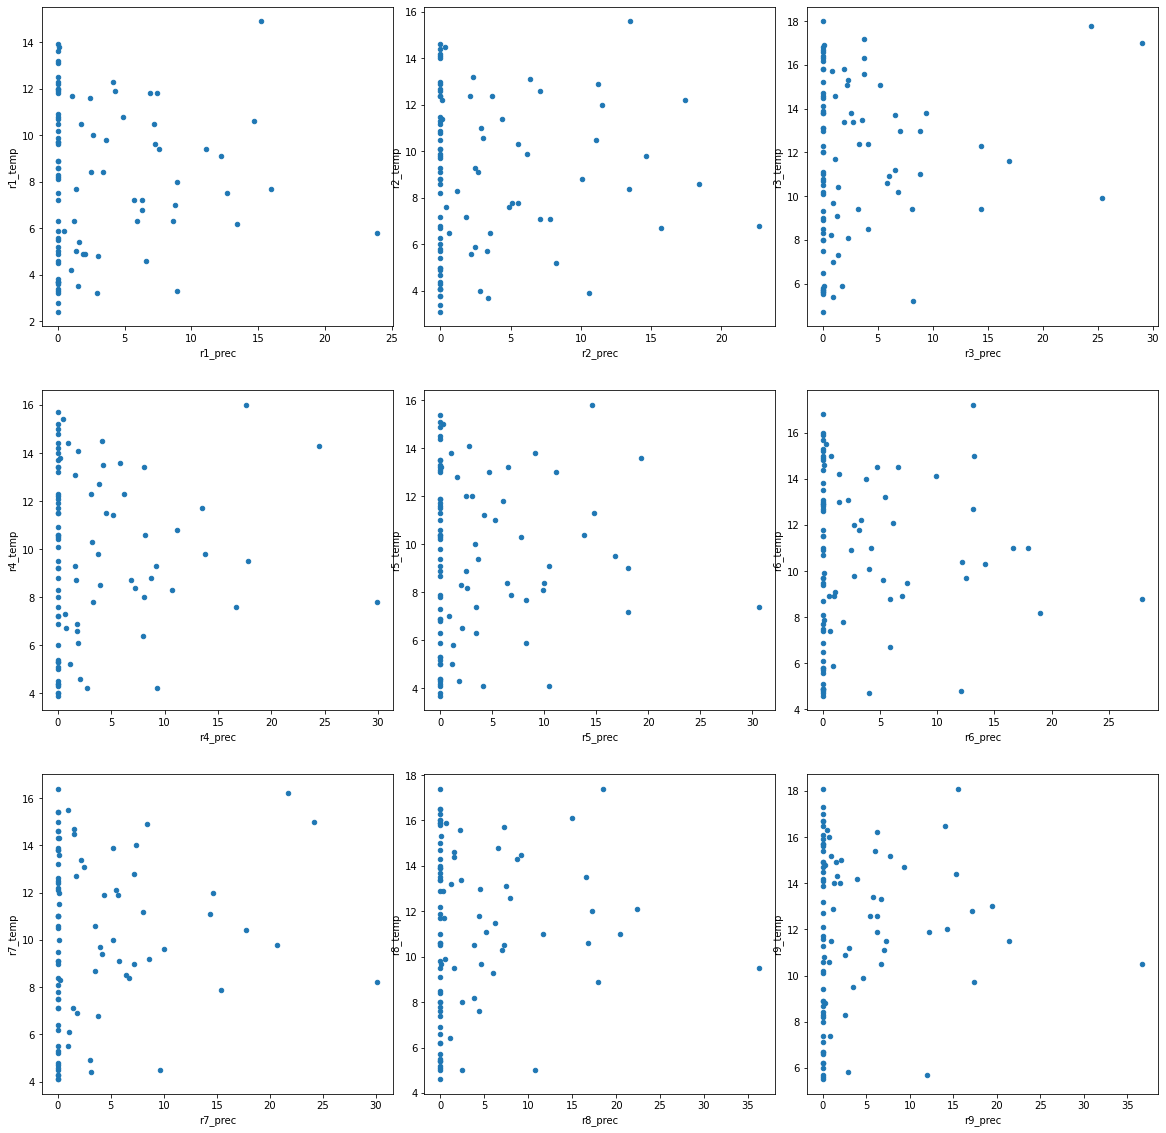

In [4]:
plot_seasonal_scatterplot(test, "Summer", 2000)

In [ ]:
f = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]

test2 = f[['r1_prec', 'r1_temp']].to_numpy()
test2

array([[15.19999981, 14.89999962],
       [ 2.4000001 , 11.60000038],
       [ 0.        , 13.10000038],
       [ 0.        , 12.5       ],
       [14.69999981, 10.60000038],
       [ 0.        , 11.80000019],
       [ 7.30000019,  9.60000038],
       [ 1.20000005,  6.30000019],
       [ 1.60000002,  5.4000001 ],
       [ 0.        ,  5.9000001 ],
       [23.89999962,  5.80000019],
       [12.69999981,  7.5       ],
       [ 1.70000005, 10.5       ],
       [ 0.        ,  8.60000038],
       [ 2.5       ,  8.39999962],
       [ 0.        ,  9.89999962],
       [ 4.9000001 , 10.80000019],
       [ 0.        , 12.30000019],
       [ 7.4000001 , 11.80000019],
       [ 0.        , 10.89999962],
       [ 0.        , 12.        ],
       [ 0.        , 11.89999962],
       [ 0.        , 13.19999981],
       [ 0.1       , 13.80000019],
       [ 4.30000019, 11.89999962],
       [ 6.9000001 , 11.80000019],
       [12.19999981,  9.10000038],
       [ 3.4000001 ,  8.39999962],
       [ 0.        ,

In [7]:
from sklearn.metrics import pairwise_distances

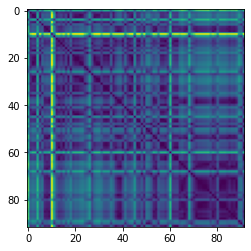

In [ ]:
D = pairwise_distances(test2)
plt.imshow(D)
plt.show()

In [ ]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

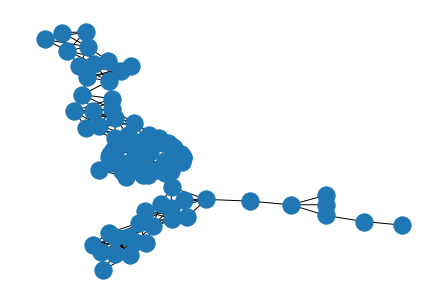

In [ ]:
r = 1
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G)

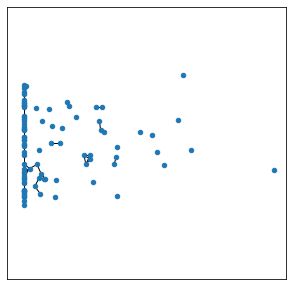

In [ ]:
pos = {n:test2[n,:] for n in range(len(test2))}
plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

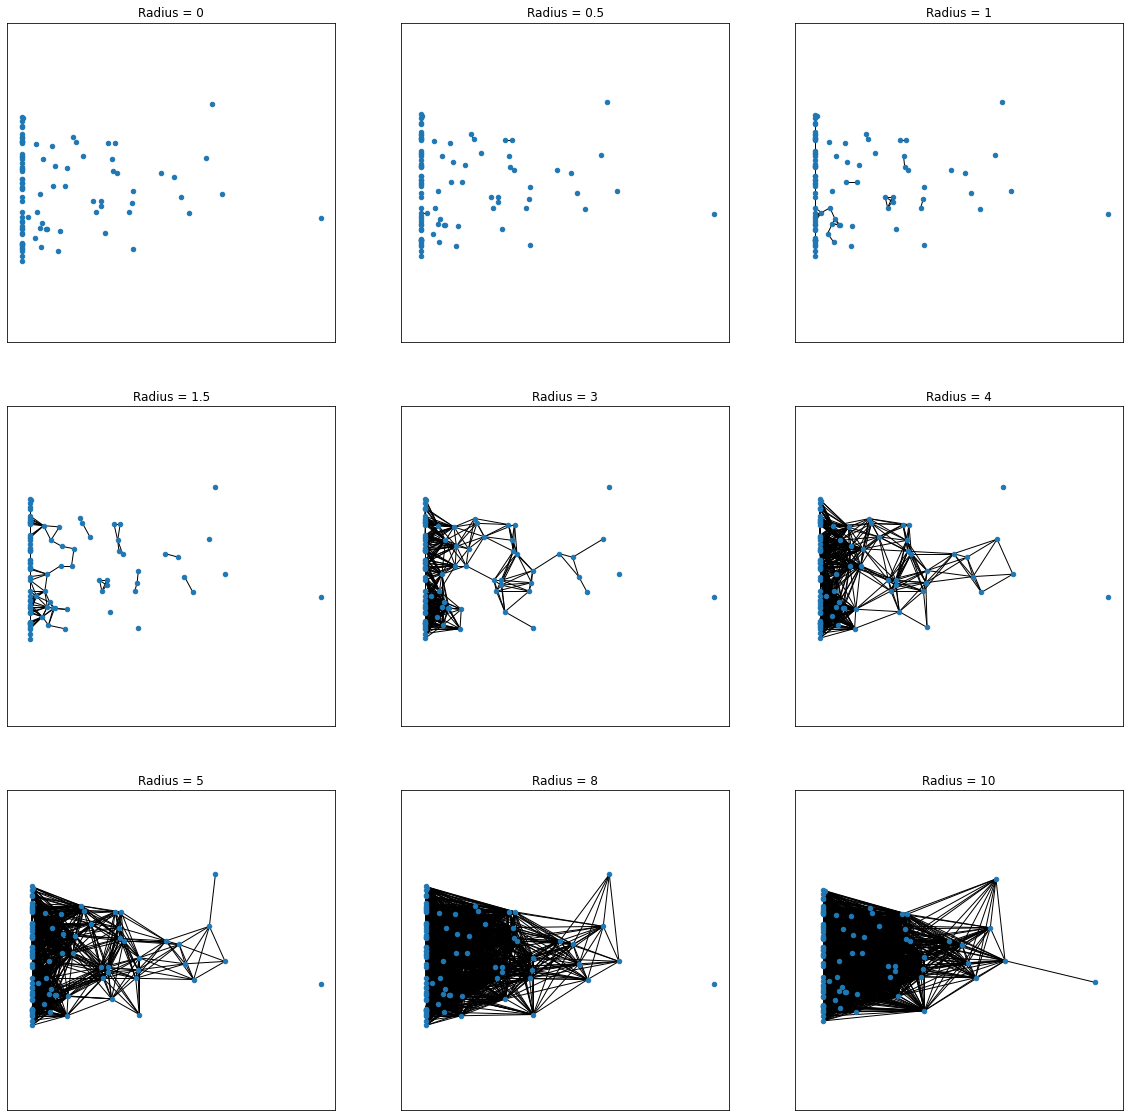

In [ ]:
rs = [0,0.5,1,1.5,3,4,5,8,10]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

In [ ]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

In [ ]:
r = 1.5
G, two_spx_list = create_2_dim_simplicial_complex(D,r)

In [ ]:
patches = []

for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

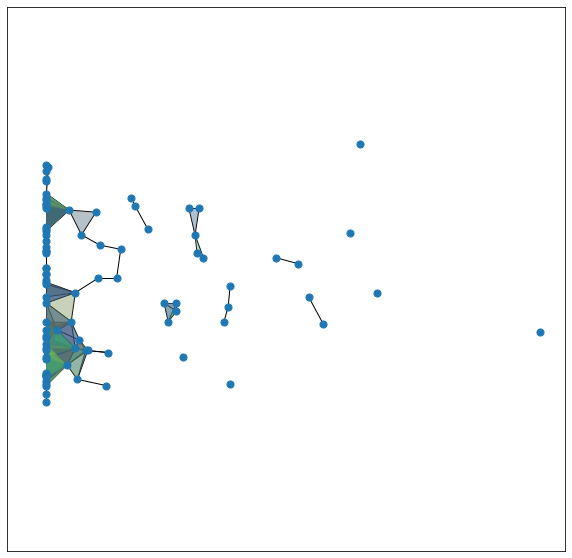

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=.15)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

In [ ]:
test2 = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]
test2

date       flow  r1_temp  r2_temp    r3_temp  r4_temp  r5_temp  \
15516  2000-07-01  10.573948     14.9     15.6  17.799999     16.0     15.8   
15517  2000-07-02  11.452162     11.6     12.4  15.100000     13.1     12.8   
15518  2000-07-03  11.499495     13.1     14.1  16.400000     14.4     14.4   
15519  2000-07-04  11.308546     12.5     14.2  18.000000     15.7     15.4   
15520  2000-07-05  14.119976     10.6     12.2  17.000000     14.3     13.6   
...           ...        ...      ...      ...        ...      ...      ...   
15603  2000-09-26   3.910194      5.2      5.4   5.600000      5.1      5.3   
15604  2000-09-27   6.290759      3.6      4.1   5.600000      4.4      4.3   
15605  2000-09-28   6.994857      3.3      3.9   5.200000      4.2      4.1   
15606  2000-09-29   7.071433      7.0      7.6   9.400000      8.3      8.1   
15607  2000-09-30   9.696474      8.1      8.8  12.000000      9.5      9.4   

         r6_temp    r7_temp  r8_temp  ...  r4_prec    r5_prec  r6_prec  \
15516  17.200001  16.200001     17.4  ...     17.6  14.600000     13.1   
15517  14.200000  13.400000     14.6  ...      1.6   1.600000      1.4   
15518  15.300000  14.600000     16.0  ...      0.0   0.000000      0.0   
15519  16.799999  16.400000     17.4  ...      0.0   0.000000      0.0   
15520  15.200000  15.000000     16.5  ...     24.5  19.299999      0.0   
...          ...        ...      ...  ...      ...        ...      ...   
15603   5.700000   4.800000      5.5  ...      0.0   0.000000      0.0   
15604   4.900000   4.300000      5.0  ...      0.0   0.000000      0.0   
15605   4.800000   4.500000      5.0  ...      9.3  10.500000     12.1   
15606   8.800000   8.500000      9.3  ...     10.7   9.900000      5.9   
15607  10.700000  10.000000     11.7  ...      0.0   0.000000      0.0   

         r7_prec  r8_prec  r9_prec  Year  Month  Day  Season  
15516  21.700001     18.5     15.6  2000      7    1  Summer  
15517   2.200000      1.5      0.9  2000      7    2  Summer  
15518   0.000000      0.0      0.0  2000      7    3  Summer  
15519   0.000000      0.0      0.0  2000      7    4  Summer  
15520  24.200001      0.0      0.0  2000      7    5  Summer  
...          ...      ...      ...   ...    ...  ...     ...  
15603   0.000000      0.0      0.0  2000      9   26  Summer  
15604   0.000000      0.0      0.0  2000      9   27  Summer  
15605   9.600000     10.8     12.0  2000      9   28  Summer  
15606   6.400000      6.0      4.6  2000      9   29  Summer  
15607   0.100000      0.4      1.2  2000      9   30  Summer  

[92 rows x 24 columns]

In [ ]:
def simpComplexes(a, r):

    D = pairwise_distances(a)
    #plt.imshow(D)
    #plt.show()

    rs = [1,2, 2.5, 3, 3.5, 4, 5, 6]
    pos = {n:a[n,:] for n in range(len(a))}

    plt.figure(figsize = (20,20))

    for (j,r) in enumerate(rs):
        G = create_simplicial_complex(D,r)
        plt.subplot(3,3,j+1)
        nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
        plt.axis('equal')
        plt.title('Radius = '+str(r))
        
    plt.show()

    #plt.figure(figsize = (7,7))
    G = create_simplicial_complex(D,r)
    #nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    #plt.axis('equal')
    #plt.show()

    G, two_spx_list = create_2_dim_simplicial_complex(D,r)

    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)


    fig, ax = plt.subplots(figsize = (7,7))

    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)

    plt.axis('equal')
    plt.show()


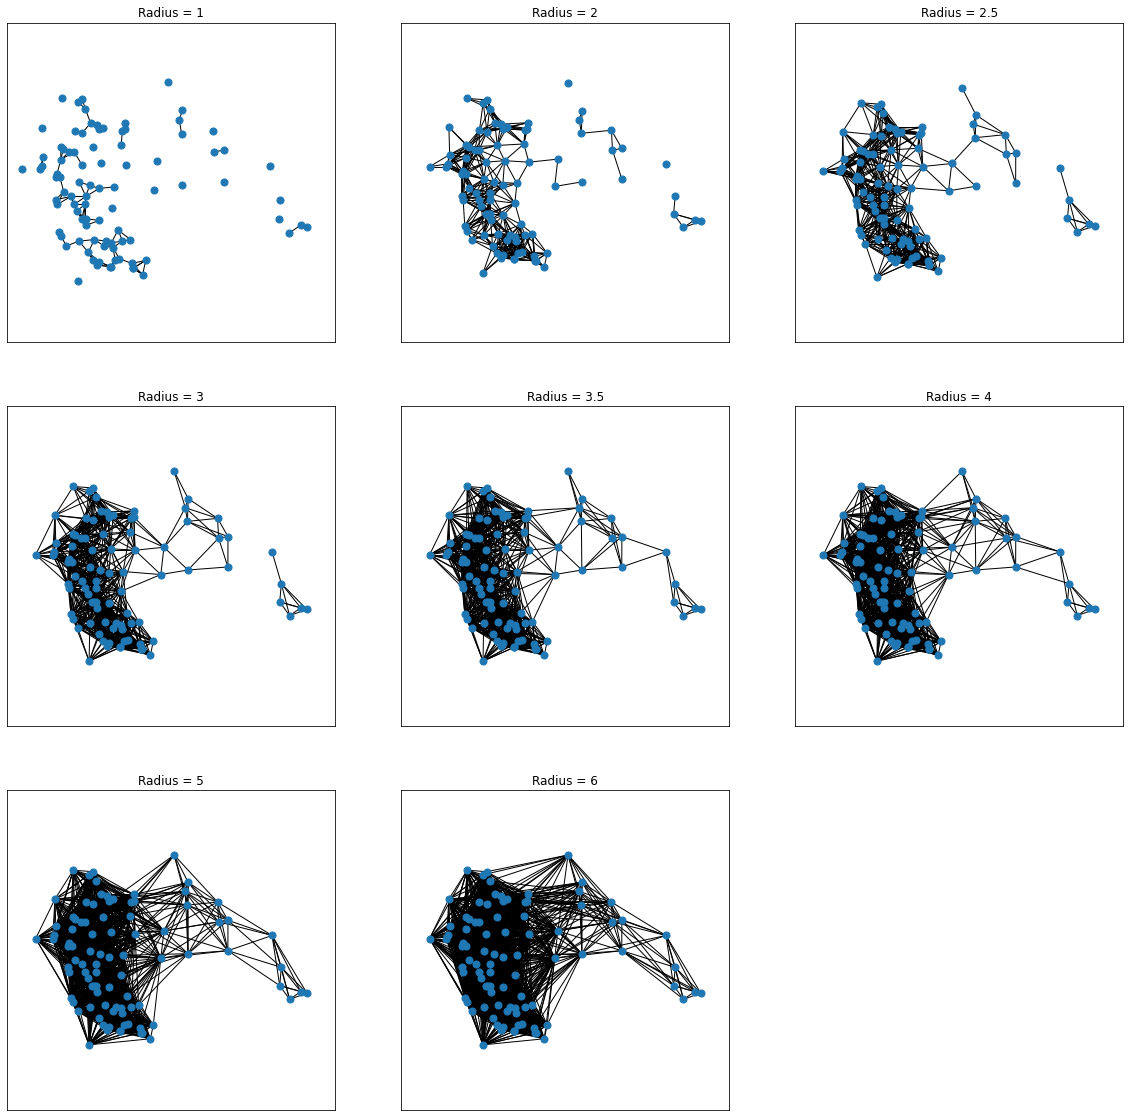

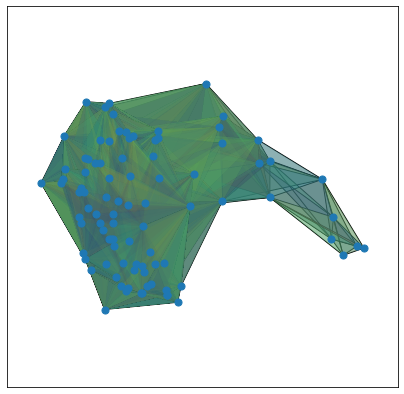

In [ ]:
test2 = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]
test2 = test2[['flow', 'r1_temp']].to_numpy()

#test2 = test2

simpComplexes(test2, 4)

In [ ]:
def lot_simplexes(data, conf):
    frame = test[(test["Season"] == 'Summer') & (test["Year"] == 2000)]

    prec = ["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]
    temp = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]
    #flow = ['flow']

    #fig, axs = plt.subplots(3, 3, figsize = (20,20), facecolor = "w", edgecolor = "k")
    #fig.subplots_adjust(hspace = .2, wspace=.09)
    #axs = axs.ravel()


    for i in range(2):
        if i == 9:
            break
        else:
            flow = 'flow'
            if conf == 'temp':
                print('here')
                conff = temp[i]
            else:
                conff = prec[i]
            test2 = frame[[flow, conff]].to_numpy()
            simpComplexes(test2, 4)
            #frame.groupby(frame["Month"]).plot.scatter(flow, temp[i], ax = axs[i])

    #plt.show()

    #test2 = test[(test['Season'] == 'Summer') & (test['Year'] == 2000)]
    #test2 = test2[['flow', 'r1_temp']].to_numpy()

    #test2 = test2

    #simpComplexes(test2, 4)

here


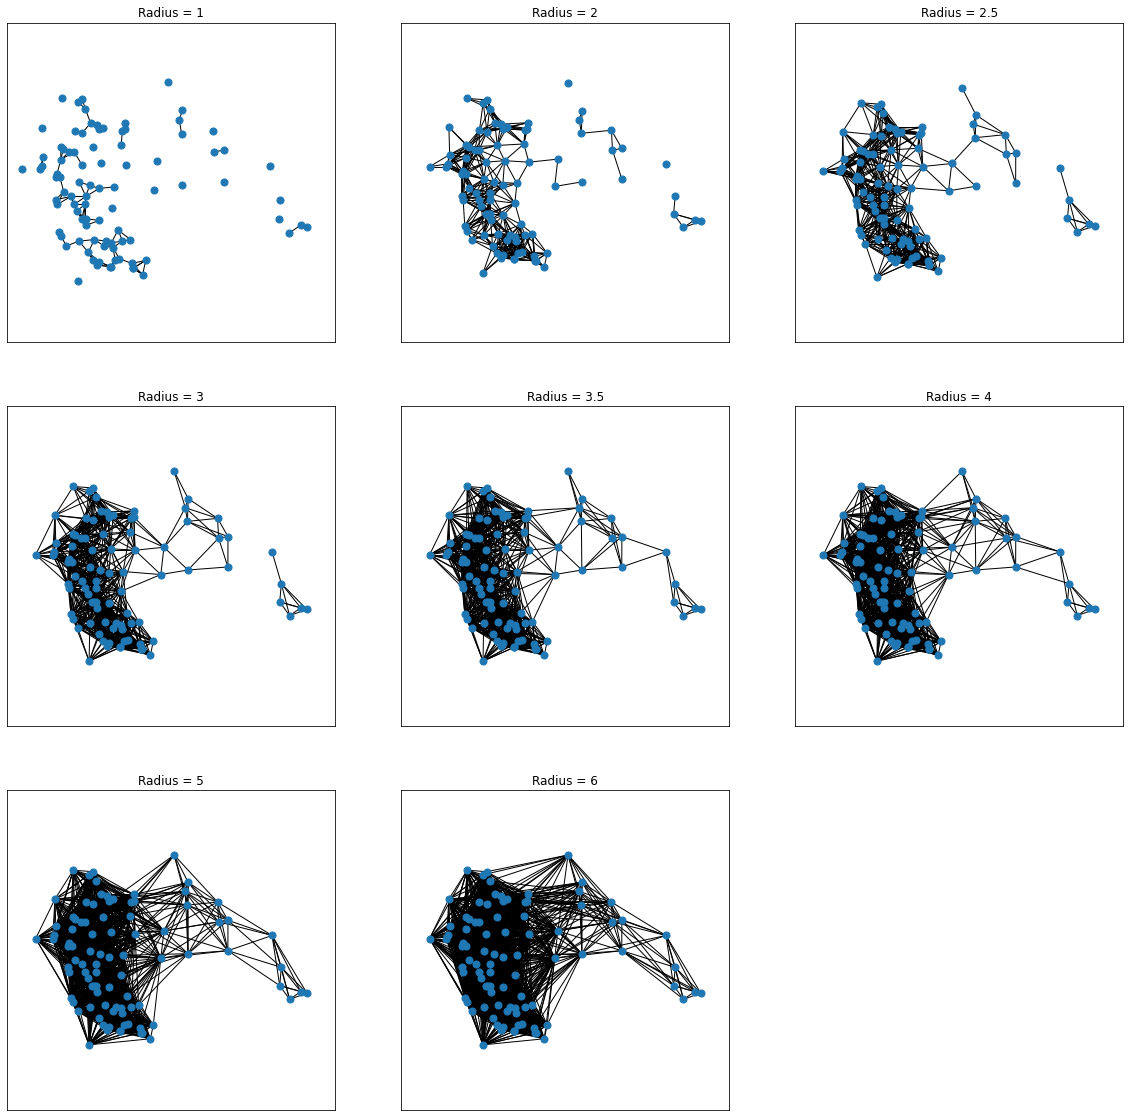

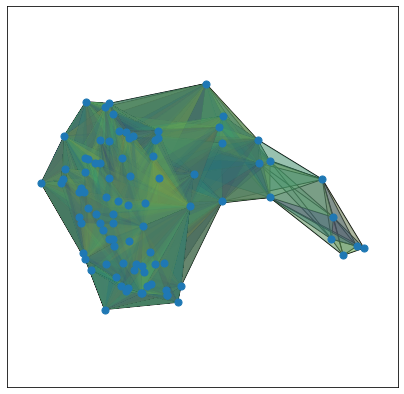

here


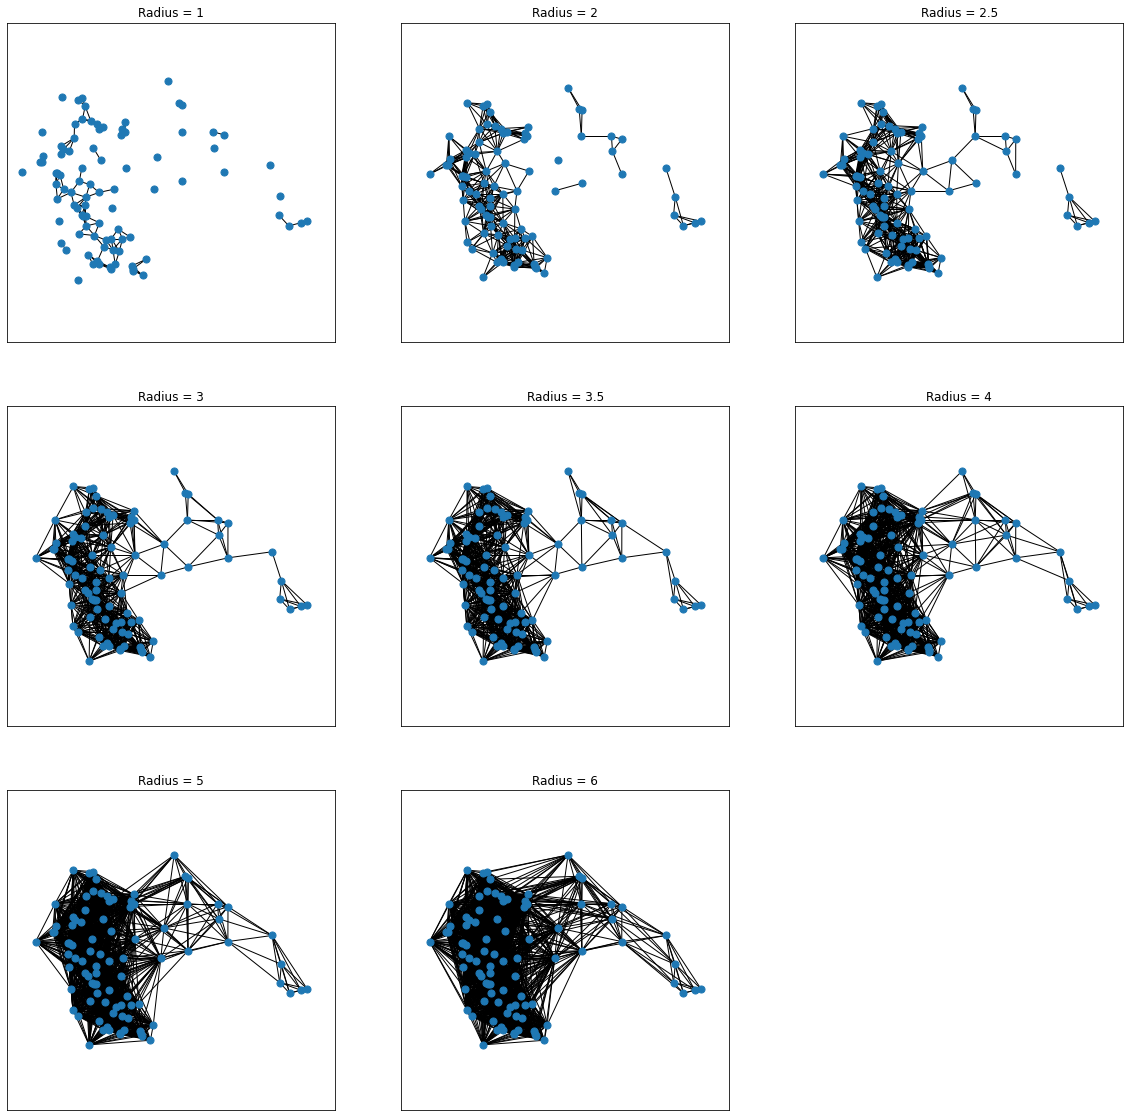

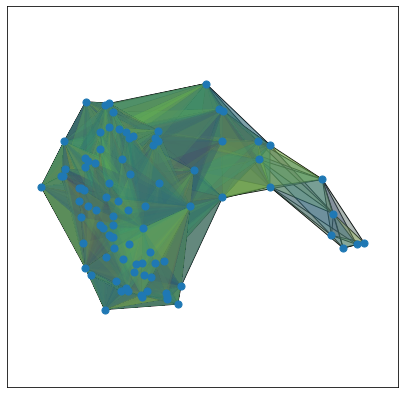

In [ ]:
lot_simplexes(test, 'temp')

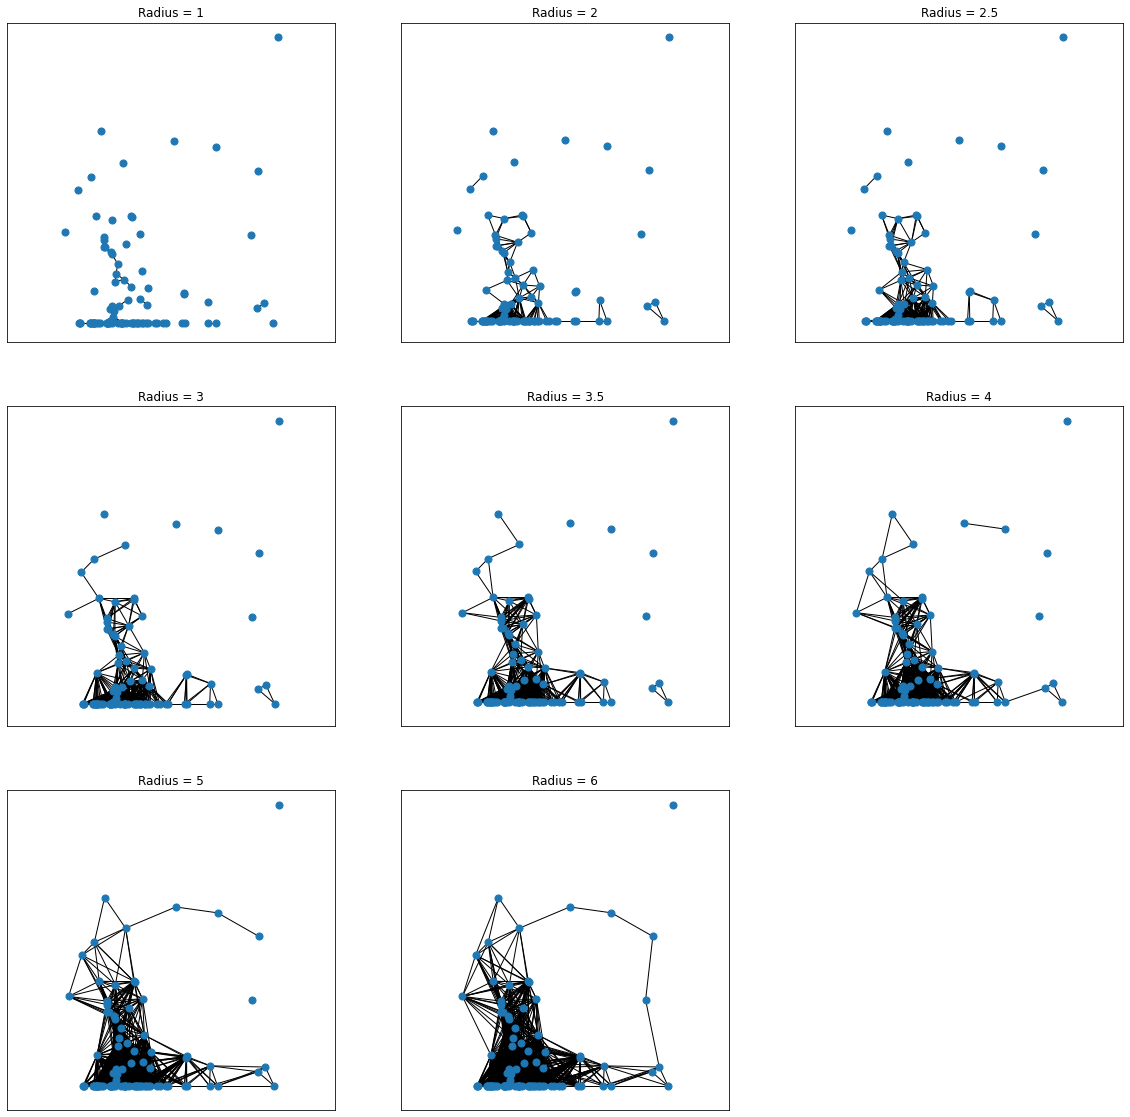

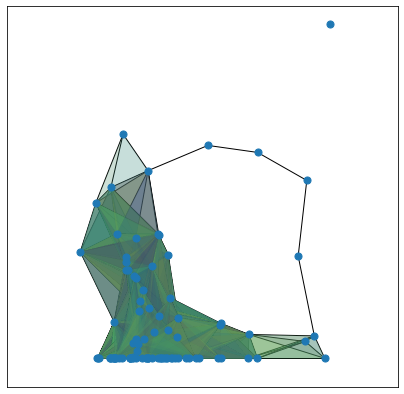

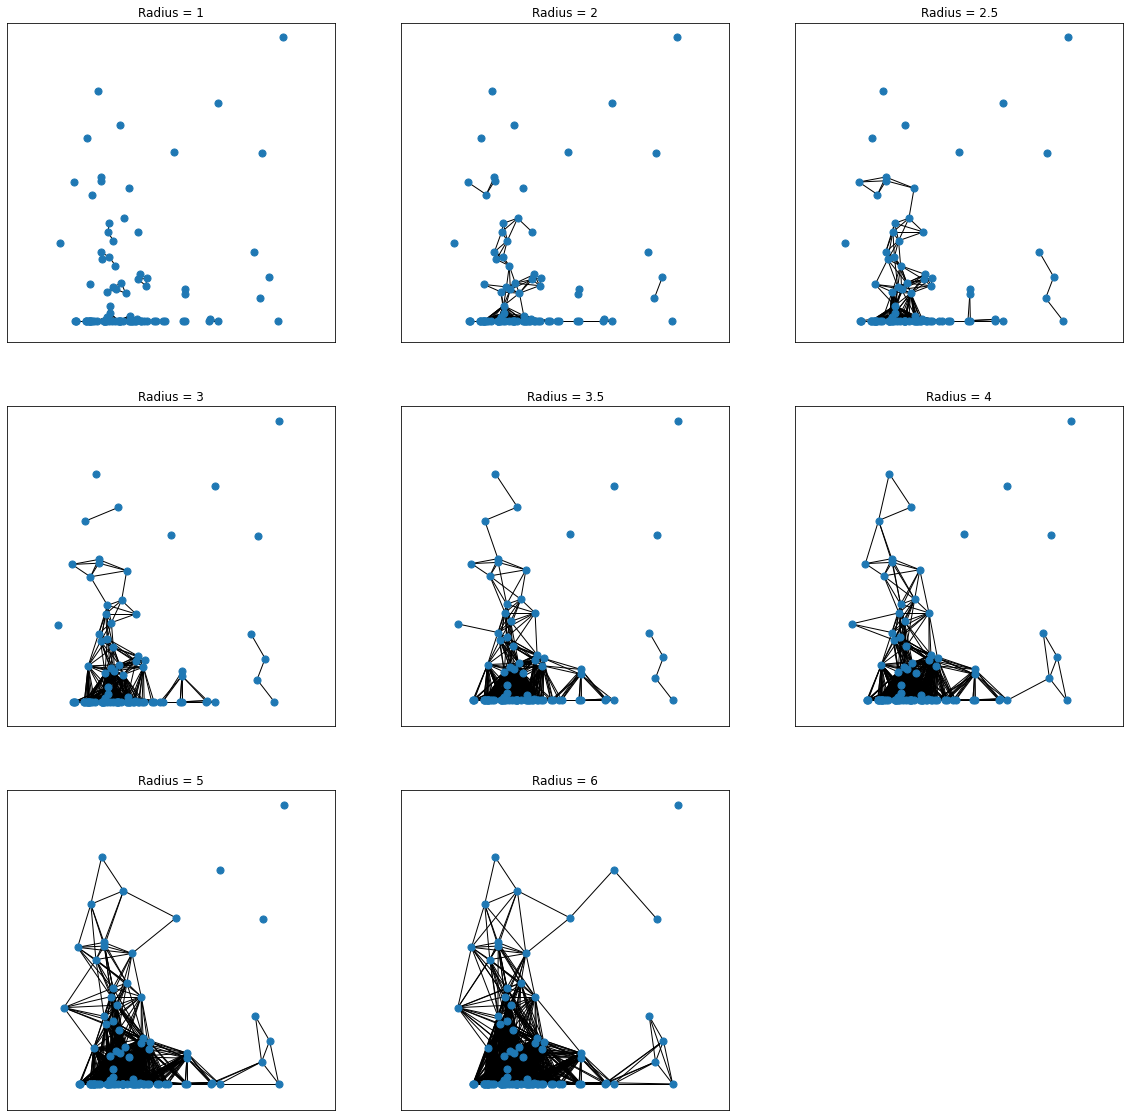

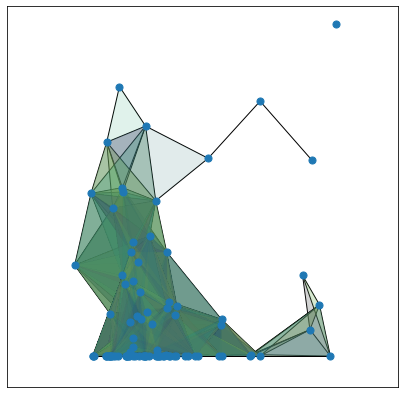

In [ ]:
lot_simplexes(test, 'prec')

## Diagramas de persistencia y Barcodes

In [4]:
import gudhi as gd

In [5]:
frame = test[(test["Season"] == 'Summer') & (test["Year"] == 2000)]
test2 = frame[['flow', 'r1_prec']]

In [8]:
D = pairwise_distances(test2)
skeleton = gd.RipsComplex(distance_matrix = D) #max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 3)

In [9]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
#for splx in rips_list[0:200] :
    #print(splx)

Number of Simplices: 2924013


In [10]:
BarCodes = Rips_complex.persistence()

usetex mode requires TeX.


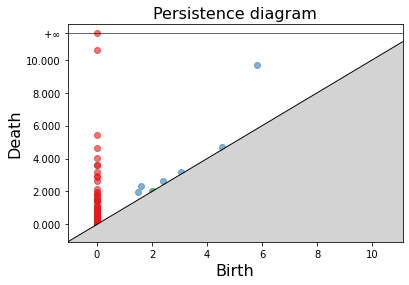

In [11]:
gd.plot_persistence_diagram(BarCodes)
plt.show()
#Rojo = vertices; azul = huecos. CUando mueren y nacen

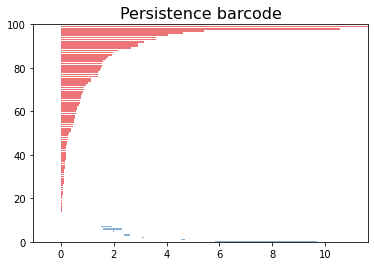

In [12]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

visualize_persistent_homology(X)

visualize_persistent_homology(X, style = 'diagrams')

### PCA

In [5]:
dfPrec = test[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]]
dfTarget = test[['flow']]
dfTemp = test[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]]
dfTemp

r1_temp    r2_temp  r3_temp  r4_temp    r5_temp  r6_temp    r7_temp  \
0        -12.8 -13.000000    -13.0    -12.5 -12.500000    -12.7 -12.000000   
1         -7.8  -7.900000     -8.4     -7.0  -7.300000     -8.6  -6.500000   
2        -11.0  -9.900000     -6.5     -8.5  -9.000000     -7.4  -7.900000   
3        -13.2 -12.200000     -7.9    -10.7 -11.300000     -9.8 -10.100000   
4        -19.9 -19.299999    -15.4    -18.4 -18.700001    -16.9 -17.700001   
...        ...        ...      ...      ...        ...      ...        ...   
21173    -12.5 -11.700000     -8.6    -11.0 -10.900000     -9.2  -9.700000   
21174    -12.5 -11.900000     -9.1    -11.4 -11.200000     -9.8 -10.600000   
21175    -11.9 -11.400000     -8.4    -10.8 -10.800000     -8.6  -9.300000   
21176     -7.0  -6.500000     -3.4     -5.9  -6.100000     -4.8  -5.000000   
21177     -2.4  -2.100000      1.3     -1.5  -1.800000     -0.8  -0.900000   

       r8_temp  r9_temp  
0        -12.5    -12.9  
1         -7.7     -8.3  
2         -6.8     -5.8  
3         -8.5     -7.4  
4        -15.9    -14.9  
...        ...      ...  
21173     -8.4     -7.5  
21174     -8.6     -7.5  
21175     -7.2     -6.3  
21176     -3.8     -3.0  
21177      0.5      1.1  

[21178 rows x 9 columns]

In [13]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)#2)

pca.fit_transform(dfTemp)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(dfTemp)
dfTempPCA = pd.DataFrame(data=principal_components, columns=['Comp 1'])#,'Comp 2'])

print(pca.singular_values_)
print(pca.components_)
dfTempPCA

[0.99252383]
[3756.12903034]
[[-0.31782544 -0.32416255 -0.34871382 -0.33152972 -0.32736406 -0.33342037
  -0.33191867 -0.33984897 -0.34407652]]


Comp 1
0      43.700607
1      28.921858
2      29.877008
3      35.950995
4      57.957928
...          ...
21173  35.446652
21174  36.483412
21175  33.836393
21176  20.798789
21177   7.838513

[21178 rows x 1 columns]

In [14]:
pca = PCA(n_components=1)#2)

pca.fit_transform(dfPrec)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(dfPrec)
dfPrecPCA = pd.DataFrame(data=principal_components, columns=['Comp 1'])#,'Comp 2'])

print(pca.singular_values_)
print(pca.components_)
dfPrecPCA

[0.93744785]
[2003.81987363]
[[0.28171521 0.30458521 0.3082175  0.3220473  0.34147939 0.34818328
  0.34184262 0.3831783  0.35725362]]


Comp 1
0      -6.578077
1       1.212091
2      31.546004
3      13.784001
4       3.656685
...          ...
21173  -5.071587
21174   7.658852
21175  -2.937514
21176   3.462255
21177  18.510594

[21178 rows x 1 columns]

In [9]:
!pip install plotly

^C


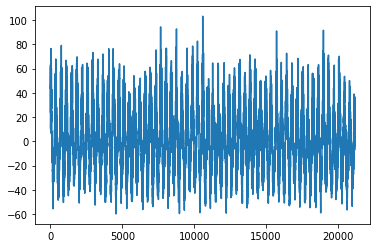

You should consider upgrading via the 'c:\users\brend\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import plotly.graph_objects as go
dfTempPCA["Comp 1"].plot()


x = np.linspace(0, len(dfTempPCA["Comp 1"]), len(dfTempPCA["Comp 1"]))
y = dfTempPCA["Comp 1"]

fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

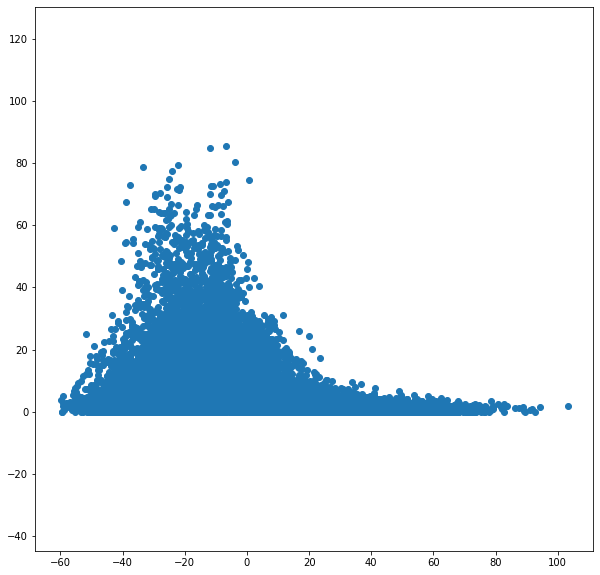

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(dfTempPCA['Comp 1'], dfTarget['flow'])
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]
x = dfTemp.loc[:, features].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)

principal_components = pca.fit_transform(x)

dfTempPCA2 = pd.DataFrame(data=principal_components, columns=['Comp 1'])

dfTempPCA2

Comp 1
0      5.046989
1      3.329095
2      3.474372
3      4.184683
4      6.733632
...         ...
21173  4.119333
21174  4.239024
21175  3.935426
21176  2.417495
21177  0.914103

[21178 rows x 1 columns]

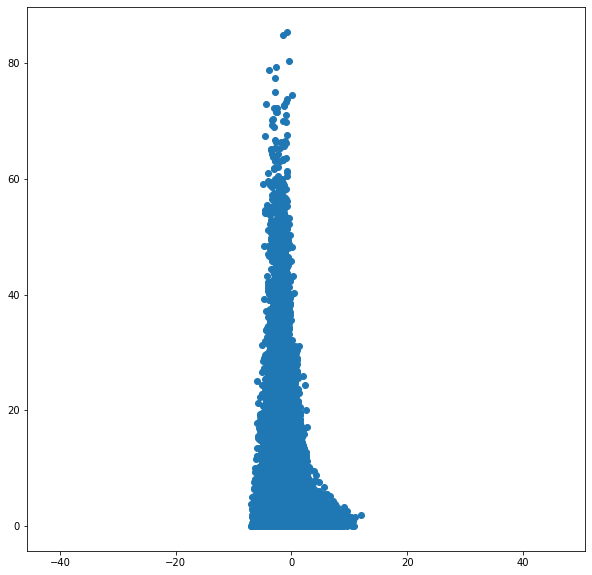

In [ ]:
plt.figure(figsize = (10,10))

plt.scatter(dfTempPCA2['Comp 1'], dfTarget['flow'])
plt.axis('equal')
plt.show()

### Feature Selection

Se usa la función de Mutual information. Mide la dependecia entre las variables y el target.
*No se limita a carrelaciones y dependencias lineales*
Escoge la región que más se relaciona al flow.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

print(dfTemp.shape)

X_new = SelectKBest(mutual_info_regression, k=1).fit_transform(dfTemp.values, dfTarget.values)

pd.DataFrame(X_new)

##Se escogio la region9

(21178, 9)


C:\Users\brend\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
0     -12.9
1      -8.3
2      -5.8
3      -7.4
4     -14.9
...     ...
21173  -7.5
21174  -7.5
21175  -6.3
21176  -3.0
21177   1.1

[21178 rows x 1 columns]

In [ ]:
X_new = SelectKBest(mutual_info_regression, k=1).fit_transform(dfPrec.values, dfTarget.values)
print(dfPrec.shape)

pd.DataFrame(X_new)

##Se escogio la region5

C:\Users\brend\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(21178, 9)


0
0       0.0
1       3.7
2      11.2
3       6.5
4       3.8
...     ...
21173   0.1
21174   3.7
21175   0.2
21176   3.5
21177   8.4

[21178 rows x 1 columns]

### Barcodes

In [13]:
from sklearn.metrics import pairwise_distances
import gudhi as gd

In [18]:
dfPrec = test[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]]
dfTarget = test[['flow']]
dfTemp = test[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]]
dfTemp

r1_temp    r2_temp  r3_temp  r4_temp    r5_temp  r6_temp    r7_temp  \
0        -12.8 -13.000000    -13.0    -12.5 -12.500000    -12.7 -12.000000   
1         -7.8  -7.900000     -8.4     -7.0  -7.300000     -8.6  -6.500000   
2        -11.0  -9.900000     -6.5     -8.5  -9.000000     -7.4  -7.900000   
3        -13.2 -12.200000     -7.9    -10.7 -11.300000     -9.8 -10.100000   
4        -19.9 -19.299999    -15.4    -18.4 -18.700001    -16.9 -17.700001   
...        ...        ...      ...      ...        ...      ...        ...   
21173    -12.5 -11.700000     -8.6    -11.0 -10.900000     -9.2  -9.700000   
21174    -12.5 -11.900000     -9.1    -11.4 -11.200000     -9.8 -10.600000   
21175    -11.9 -11.400000     -8.4    -10.8 -10.800000     -8.6  -9.300000   
21176     -7.0  -6.500000     -3.4     -5.9  -6.100000     -4.8  -5.000000   
21177     -2.4  -2.100000      1.3     -1.5  -1.800000     -0.8  -0.900000   

       r8_temp  r9_temp  
0        -12.5    -12.9  
1         -7.7     -8.3  
2         -6.8     -5.8  
3         -8.5     -7.4  
4        -15.9    -14.9  
...        ...      ...  
21173     -8.4     -7.5  
21174     -8.6     -7.5  
21175     -7.2     -6.3  
21176     -3.8     -3.0  
21177      0.5      1.1  

[21178 rows x 9 columns]

#### Temperatura

##### Summer



Number of Simplices: 14239116


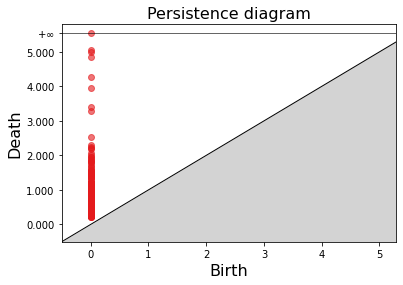

In [15]:
frame = test[(test["Season"] == 'Summer')]
test2 = frame[['flow', 'r1_temp']]

D = pairwise_distances(test2)
skeleton = gd.RipsComplex(distance_matrix = D) #max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree()#max_dimension = 3) 
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
#for splx in rips_list[0:200] :
    #print(splx)
BarCodes = Rips_complex.persistence()
gd.plot_persistence_diagram(BarCodes)
plt.show()

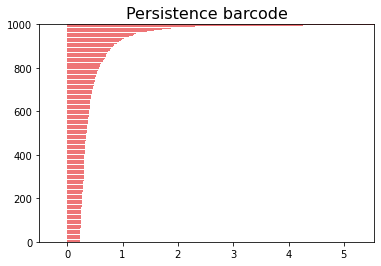

In [16]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

##### Spring

Number of Simplices: 13926003


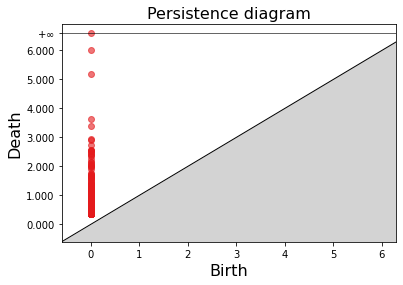

In [17]:
frame = test[(test["Season"] == 'Spring')]
test2 = frame[['flow', 'r1_temp']]

D = pairwise_distances(test2)
skeleton = gd.RipsComplex(distance_matrix = D) #max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree()#max_dimension = 3) 
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
#for splx in rips_list[0:200] :
    #print(splx)
BarCodes = Rips_complex.persistence()
gd.plot_persistence_diagram(BarCodes)
plt.show()

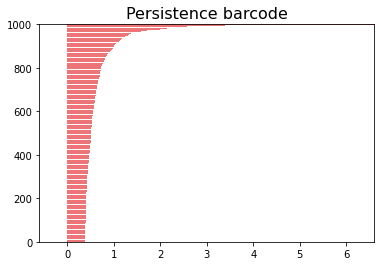

In [18]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

##### Winter

Number of Simplices: 13673835


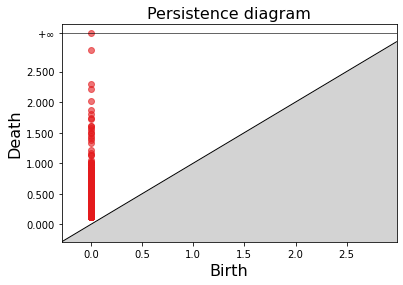

In [19]:
frame = test[(test["Season"] == 'Winter')]
test2 = frame[['flow', 'r1_temp']]

D = pairwise_distances(test2)
skeleton = gd.RipsComplex(distance_matrix = D) #max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree()#max_dimension = 3) 
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
#for splx in rips_list[0:200] :
    #print(splx)
BarCodes = Rips_complex.persistence()
gd.plot_persistence_diagram(BarCodes)
plt.show()

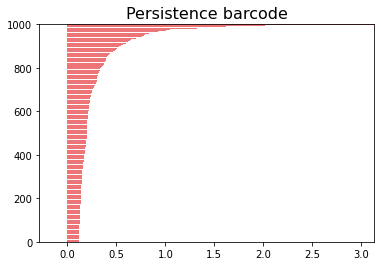

In [20]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

##### Fall

Number of Simplices: 14239116


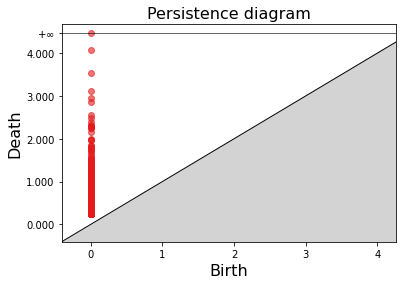

In [21]:
frame = test[(test["Season"] == 'Fall')]
test2 = frame[['flow', 'r1_temp']]

D = pairwise_distances(test2)
skeleton = gd.RipsComplex(distance_matrix = D) #max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree()#max_dimension = 3) 
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
#for splx in rips_list[0:200] :
    #print(splx)
BarCodes = Rips_complex.persistence()
gd.plot_persistence_diagram(BarCodes)
plt.show()

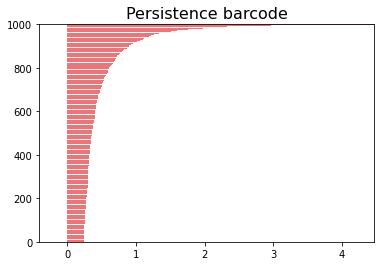

In [22]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

dfAvgMonth = test.groupby(['Year', 'Month']).mean()
dfAvgMonth = dfAvgMonth.drop('Day', axis=1)
dfAvgMonth.to_csv('avgMonthData.csv')

In [29]:
avgMonth = pd.read_csv('avgMonthData.csv')
avgMonth

Year  Month       flow    r1_temp    r2_temp    r3_temp    r4_temp  \
0    1958      1   0.629797 -10.307143  -9.950000  -9.189286  -9.264286   
1    1958      2   0.587594 -13.725000 -13.196429 -12.507143 -12.475000   
2    1958      3   0.568484 -12.016129 -11.200000  -8.829032 -10.364516   
3    1958      4   4.465059  -3.773333  -2.920000   0.043333  -1.976667   
4    1958      5  16.584016   1.387097   2.393548   5.603226   3.448387   
..    ...    ...        ...        ...        ...        ...        ...   
691  2015      8  11.422987   9.438710  10.219355  13.003226  10.948387   
692  2015      9  28.201833   6.103333   6.823333   9.376667   7.613333   
693  2015     10   2.733366   1.641935   2.125806   3.987097   2.674194   
694  2015     11   3.136748  -1.643333  -1.296667  -0.273333  -0.680000   
695  2015     12   3.105860  -3.787097  -3.235484  -1.500000  -2.412903   

       r5_temp    r6_temp    r7_temp  ...    r9_temp   r1_prec   r2_prec  \
0    -9.392857  -9.242857  -8.910714  ...  -8.367857  1.978571  1.839286   
1   -12.628571 -12.096428 -12.042857  ... -12.039286  1.164286  1.057143   
2   -10.529032  -8.841935  -9.787097  ...  -8.125806  0.096774  0.000000   
3    -2.270000  -0.940000  -1.496667  ...   0.460000  1.296667  1.353333   
4     3.116129   4.458065   3.964516  ...   6.187097  2.064516  2.138710   
..         ...        ...        ...  ...        ...       ...       ...   
691  10.741935  12.125806  11.348387  ...  13.938710  3.380645  3.593548   
692   7.353333   8.570000   8.033333  ...  10.170000  5.716667  5.403333   
693   2.561290   3.535484   3.000000  ...   4.796774  0.274194  0.264516   
694  -0.813333  -0.353333  -0.310000  ...   0.316667  1.886667  2.056667   
695  -2.583871  -1.664516  -1.780645  ...  -0.635484  2.183871  1.925806   

      r3_prec   r4_prec   r5_prec   r6_prec   r7_prec   r8_prec   r9_prec  
0    2.271429  2.075000  1.935714  1.814286  2.157143  1.978571  1.603571  
1    0.896429  1.096429  1.260714  1.228571  1.203571  1.267857  1.478571  
2    0.074194  0.122581  0.196774  0.038710  0.190323  0.174194  0.209677  
3    1.110000  1.493333  1.963333  2.150000  1.703333  2.203333  2.373333  
4    1.980645  2.180645  2.290323  2.719355  2.403226  2.803226  2.909677  
..        ...       ...       ...       ...       ...       ...       ...  
691  3.893548  4.003226  3.912903  3.612903  4.119355  3.867742  3.416129  
692  7.550000  6.646667  6.586667  7.023333  7.276667  7.840000  7.733333  
693  0.458065  0.383871  0.348387  0.316129  0.445161  0.332258  0.206452  
694  1.910000  2.126667  2.033333  2.220000  1.773333  1.483333  2.033333  
695  2.164516  2.348387  1.780645  1.874194  1.877419  0.712903  1.825806  

[696 rows x 21 columns]

In [ ]:
avgMonth['Season'] = ''

for i in range(len(avgMonth["Month"])):
    if avgMonth["Month"][i] in [1, 2, 12]:
        avgMonth["Season"][i] = "Winter"
    elif avgMonth["Month"][i] in [4, 5, 3]:
        avgMonth["Season"][i] = "Spring"
    elif avgMonth["Month"][i] in [7, 8, 6]:
        avgMonth["Season"][i] = "Summer"
    elif avgMonth["Month"][i] in [10, 11, 9]:
        avgMonth["Season"][i] = "Fall"


newAvgMonth = pd.DataFrame()
newAvgMonth['Year'] = avgMonth['Year']
newAvgMonth['Month'] = avgMonth['Month']
newAvgMonth['Season'] = avgMonth['Season']
newAvgMonth['flow'] = avgMonth['flow']
newAvgMonth['Temp'] = avgMonth[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]].mean(axis = 1)
newAvgMonth['flow'] = avgMonth[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]].mean(axis = 1)

newAvgMonth

In [45]:
ola = avgMonth[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]].mean(axis = 1)
ola

0      -9.278968
1     -12.514683
2      -9.787097
3      -1.451481
4       3.987814
         ...    
691    11.614337
692     8.135556
693     3.146595
694    -0.575185
695    -2.081720
Length: 696, dtype: float64

In [33]:
newTemp = avgMonth[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]]
target = avgMonth[['flow']]
newPrec = avgMonth[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]]

In [32]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)#2)

pca.fit_transform(newTemp)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(newTemp)
dfTempPCA = pd.DataFrame(data=principal_components, columns=['Comp 1'])#,'Comp 2'])

print(pca.singular_values_)
print(pca.components_)
dfTempPCA

[0.997722]
[618.84218117]
[[-0.31497785 -0.32206706 -0.35063577 -0.32910639 -0.32541272 -0.33386796
  -0.33012644 -0.34182788 -0.35016323]]


Comp 1
0    33.387744
1    43.092840
2    34.835488
3     9.828791
4    -6.493783
..         ...
691 -29.347342
692 -18.903495
693  -3.916027
694   7.285124
695  11.764019

[696 rows x 1 columns]

In [34]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)#2)

pca.fit_transform(newTemp)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(newTemp)
dfTempPCA = pd.DataFrame(data=principal_components, columns=['Comp 1'])#,'Comp 2'])

print(pca.singular_values_)
print(pca.components_)
dfTempPCA

[0.997722]
[618.84218117]
[[-0.31497785 -0.32206706 -0.35063577 -0.32910639 -0.32541272 -0.33386796
  -0.33012644 -0.34182788 -0.35016323]]


Comp 1
0    33.387744
1    43.092840
2    34.835488
3     9.828791
4    -6.493783
..         ...
691 -29.347342
692 -18.903495
693  -3.916027
694   7.285124
695  11.764019

[696 rows x 1 columns]

Componentes similares, entonces se hace un promedio de las regiones EPA.gov divided stuff like that

In [39]:
avgMonth['Season'] = ''

for i in range(len(avgMonth["Month"])):
    if avgMonth["Month"][i] in [1, 2, 12]:
        avgMonth["Season"][i] = "Winter"
    elif avgMonth["Month"][i] in [4, 5, 3]:
        avgMonth["Season"][i] = "Spring"
    elif avgMonth["Month"][i] in [7, 8, 6]:
        avgMonth["Season"][i] = "Summer"
    elif avgMonth["Month"][i] in [10, 11, 9]:
        avgMonth["Season"][i] = "Fall"

avgMonth

<ipython-input-39-2f68fb971b92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgMonth["Season"][i] = "Winter"
<ipython-input-39-2f68fb971b92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgMonth["Season"][i] = "Spring"
<ipython-input-39-2f68fb971b92>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgMonth["Season"][i] = "Summer"
<ipython-input-39-2f68fb971b92>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy

Year  Month       flow    r1_temp    r2_temp    r3_temp    r4_temp  \
0    1958      1   0.629797 -10.307143  -9.950000  -9.189286  -9.264286   
1    1958      2   0.587594 -13.725000 -13.196429 -12.507143 -12.475000   
2    1958      3   0.568484 -12.016129 -11.200000  -8.829032 -10.364516   
3    1958      4   4.465059  -3.773333  -2.920000   0.043333  -1.976667   
4    1958      5  16.584016   1.387097   2.393548   5.603226   3.448387   
..    ...    ...        ...        ...        ...        ...        ...   
691  2015      8  11.422987   9.438710  10.219355  13.003226  10.948387   
692  2015      9  28.201833   6.103333   6.823333   9.376667   7.613333   
693  2015     10   2.733366   1.641935   2.125806   3.987097   2.674194   
694  2015     11   3.136748  -1.643333  -1.296667  -0.273333  -0.680000   
695  2015     12   3.105860  -3.787097  -3.235484  -1.500000  -2.412903   

       r5_temp    r6_temp    r7_temp  ...   r1_prec   r2_prec   r3_prec  \
0    -9.392857  -9.242857  -8.910714  ...  1.978571  1.839286  2.271429   
1   -12.628571 -12.096428 -12.042857  ...  1.164286  1.057143  0.896429   
2   -10.529032  -8.841935  -9.787097  ...  0.096774  0.000000  0.074194   
3    -2.270000  -0.940000  -1.496667  ...  1.296667  1.353333  1.110000   
4     3.116129   4.458065   3.964516  ...  2.064516  2.138710  1.980645   
..         ...        ...        ...  ...       ...       ...       ...   
691  10.741935  12.125806  11.348387  ...  3.380645  3.593548  3.893548   
692   7.353333   8.570000   8.033333  ...  5.716667  5.403333  7.550000   
693   2.561290   3.535484   3.000000  ...  0.274194  0.264516  0.458065   
694  -0.813333  -0.353333  -0.310000  ...  1.886667  2.056667  1.910000   
695  -2.583871  -1.664516  -1.780645  ...  2.183871  1.925806  2.164516   

      r4_prec   r5_prec   r6_prec   r7_prec   r8_prec   r9_prec  Season  
0    2.075000  1.935714  1.814286  2.157143  1.978571  1.603571  Winter  
1    1.096429  1.260714  1.228571  1.203571  1.267857  1.478571  Winter  
2    0.122581  0.196774  0.038710  0.190323  0.174194  0.209677  Spring  
3    1.493333  1.963333  2.150000  1.703333  2.203333  2.373333  Spring  
4    2.180645  2.290323  2.719355  2.403226  2.803226  2.909677  Spring  
..        ...       ...       ...       ...       ...       ...     ...  
691  4.003226  3.912903  3.612903  4.119355  3.867742  3.416129  Summer  
692  6.646667  6.586667  7.023333  7.276667  7.840000  7.733333    Fall  
693  0.383871  0.348387  0.316129  0.445161  0.332258  0.206452    Fall  
694  2.126667  2.033333  2.220000  1.773333  1.483333  2.033333    Fall  
695  2.348387  1.780645  1.874194  1.877419  0.712903  1.825806  Winter  

[696 rows x 22 columns]

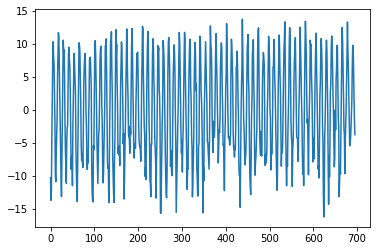

In [43]:
import plotly.graph_objects as go
avgMonth["r1_temp"].plot()


x = np.linspace(0, len(avgMonth["Year"]), len(avgMonth["Year"]))
y = avgMonth["r1_temp"]

fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()